In [154]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [155]:
#load data
df = pd.read_csv('Nigeria_1997-2024_Sep20_cleaned.csv')
df.head()

,event_date,year,disorder_type,event_type,sub_event_type,actor1,inter1,civilian_targeting,admin1,admin2,location,latitude,longitude,fatalities
0,2024-09-20,2024,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),6,Unknown,Borno,Maiduguri Metro,Bolori,11.8826,13.0890,0
1,2024-09-20,2024,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),6,Unknown,Osun,Ife Central,Ile-Ife,7.4824,4.5603,0
2,2024-09-19,2024,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),6,Unknown,Oyo,Ibadan North,Agodi,7.4035,3.9132,0
3,2024-09-19,2024,Strategic developments,Strategic developments,Disrupted weapons use,Police Forces of Nigeria (2023-),1,Unknown,Kaduna,Chikun,Buruku,10.6179,7.2331,0
4,2024-09-19,2024,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),6,Unknown,Edo,Etsako East,Wanno,7.1389,6.5724,0


In [3]:
df.shape 

(37794, 14)

In [156]:
df['event_date'] = pd.to_datetime(df['event_date'])

In [157]:
#create month column
df['month'] = df['event_date'].dt.month
df.head(3)

,event_date,year,disorder_type,event_type,sub_event_type,actor1,inter1,civilian_targeting,admin1,admin2,location,latitude,longitude,fatalities,month
0,2024-09-20,2024,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),6,Unknown,Borno,Maiduguri Metro,Bolori,11.8826,13.0890,0,9
1,2024-09-20,2024,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),6,Unknown,Osun,Ife Central,Ile-Ife,7.4824,4.5603,0,9
2,2024-09-19,2024,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),6,Unknown,Oyo,Ibadan North,Agodi,7.4035,3.9132,0,9


In [158]:
df['month'].unique()

array([ 9,  8,  7,  6,  5,  4,  3,  2,  1, 12, 11, 10])

In [138]:
df.drop(columns='event_date', inplace=True)
df.head(3)

,year,disorder_type,event_type,sub_event_type,actor1,inter1,civilian_targeting,admin1,admin2,location,latitude,longitude,fatalities
0,2024,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),6,Unknown,Borno,Maiduguri Metro,Bolori,11.8826,13.0890,0
1,2024,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),6,Unknown,Osun,Ife Central,Ile-Ife,7.4824,4.5603,0
2,2024,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),6,Unknown,Oyo,Ibadan North,Agodi,7.4035,3.9132,0


In [159]:
#categorical column

cat_col = [var  for var in df.columns if df[var].dtype=='object']
cat_col

['disorder_type',
 'event_type',
 'sub_event_type',
 'actor1',
 'civilian_targeting',
 'admin1',
 'admin2',
 'location']

In [160]:
df['event_type'].unique()

array(['Protests', 'Strategic developments', 'Battles', 'Riots',
       'Violence against civilians', 'Explosions/Remote violence'],
      dtype=object)

In [161]:
df.head()

,event_date,year,disorder_type,event_type,sub_event_type,actor1,inter1,civilian_targeting,admin1,admin2,location,latitude,longitude,fatalities,month
0,2024-09-20,2024,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),6,Unknown,Borno,Maiduguri Metro,Bolori,11.8826,13.0890,0,9
1,2024-09-20,2024,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),6,Unknown,Osun,Ife Central,Ile-Ife,7.4824,4.5603,0,9
2,2024-09-19,2024,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),6,Unknown,Oyo,Ibadan North,Agodi,7.4035,3.9132,0,9
3,2024-09-19,2024,Strategic developments,Strategic developments,Disrupted weapons use,Police Forces of Nigeria (2023-),1,Unknown,Kaduna,Chikun,Buruku,10.6179,7.2331,0,9
4,2024-09-19,2024,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),6,Unknown,Edo,Etsako East,Wanno,7.1389,6.5724,0,9


In [162]:
#Drop the event_data column
df.drop(columns='event_date', inplace=True)

In [164]:
#Import necessary libraries

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, cross_validate

In [165]:
#Categorical encoding using label encoding 

label = LabelEncoder()

for var in cat_col: 
    df[var]  = label.fit_transform(df[var])

In [166]:
df.head()

,year,disorder_type,event_type,sub_event_type,actor1,inter1,civilian_targeting,admin1,admin2,location,latitude,longitude,fatalities,month
0,2024,0,2,17,737,6,1,7,458,775,11.8826,13.0890,0,9
1,2024,0,2,17,737,6,1,29,286,2095,7.4824,4.5603,0,9
2,2024,0,2,17,737,6,1,30,263,153,7.4035,3.9132,0,9
3,2024,3,4,7,723,1,1,18,131,867,10.6179,7.2331,0,9
4,2024,0,2,17,737,6,1,11,200,4918,7.1389,6.5724,0,9


In [167]:

X = df.drop(columns='fatalities')
y = df['fatalities']

In [168]:
#Train test split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [169]:
#Model Building

models = {
    'Linear_Model': LinearRegression(),
    'Random Forest' : RandomForestRegressor(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBOOST': XGBRegressor()
}

model_result = {}

for model_name, model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test,y_pred , squared=False)
    model_result[model_name] = {'MAE': mae, 'Root_mean_squared_error': rmse,
                               'MSE': mse}


In [171]:
#model Result

pd.DataFrame(model_result).T


,MAE,Root_mean_squared_error,MSE
Linear_Model,3.989579,11.671423,136.222111
Random Forest,3.476327,12.110778,146.670952
Decision Tree,4.101278,19.094792,364.611101
Gradient Boosting,3.425965,11.095971,123.120563
XGBOOST,3.627129,12.054561,145.312453


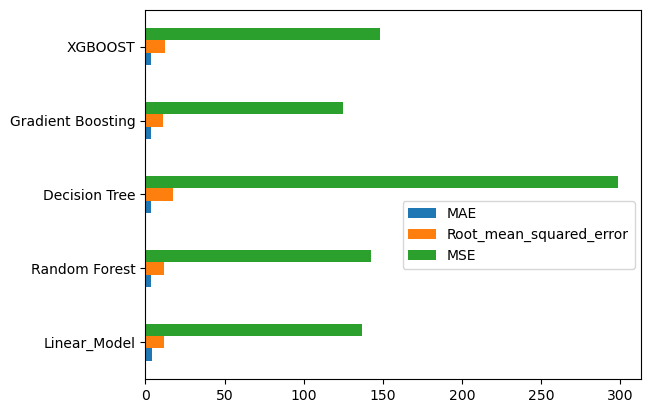

In [153]:
pd.DataFrame(model_result).T.plot(kind='barh')
plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5));

### Gradient Boosting hyperparameter tuning using Grid Search

In [172]:
gb = GradientBoostingRegressor()

param_grid = {
    'n_estimators': [200,400, 700],
    'max_depth': [10,20,30],
    'max_leaf_nodes': [50, 100]
}

grid_model = GridSearchCV(
        estimator=gb,
        param_grid=param_grid, 
        cv=5, 
        n_jobs=-1, 
        scoring='neg_root_mean_squared_error',
        verbose=0
    )
model = grid_model.fit(X_train, y_train)

In [173]:
model.best_params_

{'max_depth': 30, 'max_leaf_nodes': 50, 'n_estimators': 200}

In [174]:
model.best_score_

-16.218770801894944

In [194]:
#Model Evaluation

rmse_gb = mean_squared_error(y_test, model.predict(X_test), squared=False)

print(f"Root mean squared error : {rmse_gb}")

Root mean squared error : 12.020915091652782


### Xgboost hyperparameter tuning using Hyperopt 

In [177]:
from hyperopt import hp, fmin, rand, Trials, tpe


In [195]:
param_space = {
    'n_estimators': hp.quniform('n_estimators', 200, 2500, 100),
    'max_depth': hp.quniform('max_depth', 1, 10, 1),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.001), np.log(1)),
    'gamma': hp.loguniform('gamma', np.log(0.01), np.log(10)),
    'subsample': hp.uniform('subsample', 0.50, 0.90),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.50, 0.99),
    'colsample_bylevel': hp.uniform('colsample_bylevel', 0.50, 0.99),
    'colsample_bynode': hp.uniform('colsample_bynode', 0.50, 0.99),
    'reg_lambda': hp.uniform('reg_lambda', 1, 20)
}

In [196]:
def objective(param):
    param_dict = {
        'n_estimators': int(param['n_estimators']),
        'max_depth' : int(param['max_depth']),
        'learning_rate' : param['learning_rate'],
        'gamma' : param['gamma'],
        'subsample' : param['subsample'],
        'colsample_bytree' : param['colsample_bytree'],
        'colsample_bylevel' : param['colsample_bylevel'],
        'colsample_bynode' : param['colsample_bynode'],
        'reg_lambda' : param['reg_lambda']
        
    }
    
    xgb = XGBRegressor(**param_dict)
    score = cross_val_score(xgb, X_train,y_train ,cv=5, 
                           scoring='neg_root_mean_squared_error', n_jobs=-1).mean()
    
    return score

In [197]:
tpe_search = fmin(fn=objective,
                 space=param_space,
                  algo=tpe.suggest,
                 max_evals=5,
                 rstate=np.random.default_rng(42))

100%|█████████████████████████████████████████████████| 5/5 [00:50<00:00, 10.11s/trial, best loss: -15.834473610732038]


In [198]:
tpe_search 

{'colsample_bylevel': 0.7372506038608606,
 'colsample_bynode': 0.6587595275005627,
 'colsample_bytree': 0.8506236449654188,
 'gamma': 0.02194768920015761,
 'learning_rate': 0.20117276880696025,
 'max_depth': 7.0,
 'n_estimators': 2200.0,
 'reg_lambda': 12.782260955856179,
 'subsample': 0.8254621630561152}

In [199]:
# converting the parameters from float to integer

tpe_search = {key : int(value) if key in ('n_estimators','max_depth') else value for key, value in tpe_search.items()}

In [200]:
best_param = tpe_search
best_param

{'colsample_bylevel': 0.7372506038608606,
 'colsample_bynode': 0.6587595275005627,
 'colsample_bytree': 0.8506236449654188,
 'gamma': 0.02194768920015761,
 'learning_rate': 0.20117276880696025,
 'max_depth': 7,
 'n_estimators': 2200,
 'reg_lambda': 12.782260955856179,
 'subsample': 0.8254621630561152}

In [184]:
#Xgboost model building

xgb = XGBRegressor(**best_param)

xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.7372506038608606,
             colsample_bynode=0.6587595275005627,
             colsample_bytree=0.8506236449654188, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.02194768920015761,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.20117276880696025,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<Axes: >

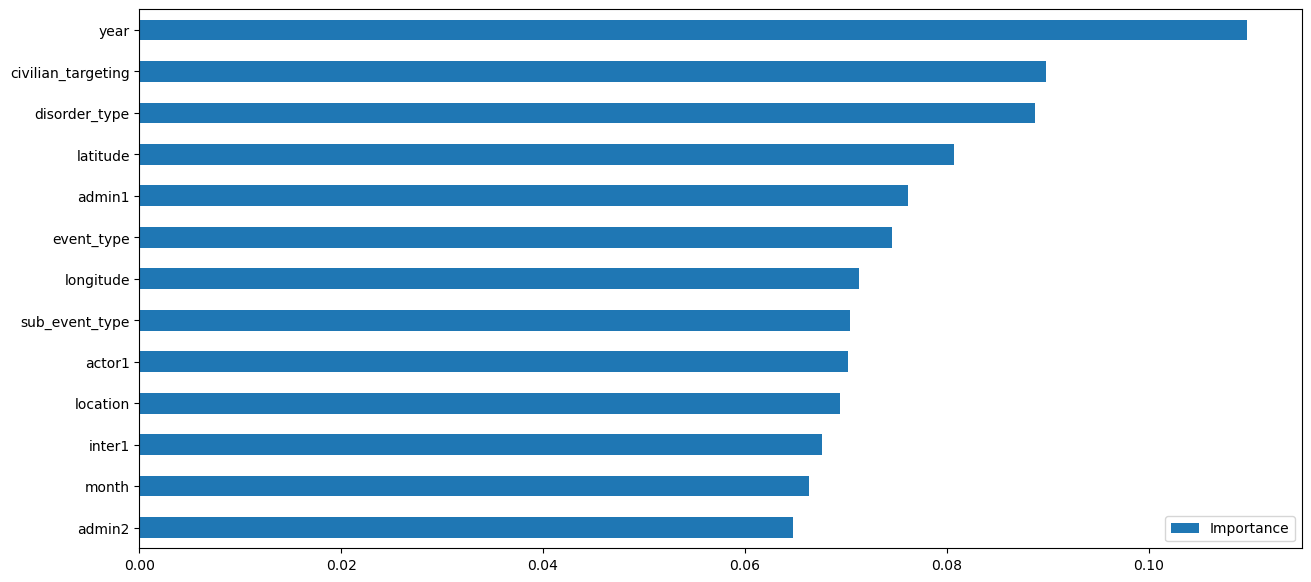

In [201]:
#Xgboost Model feature Importance 

pd.DataFrame(xgb.feature_importances_, index = X.columns, columns=['Importance']).sort_values(
ascending=True, by='Importance').plot(kind='barh', figsize=(15,7))

In [203]:
#Xgboost model evaluation 

rmse_xgb = mean_squared_error(y_test, xgb.predict(X_test), squared=False)

print(f"Root_mean_squared_xgb : {rmse_xgb}")

Root_mean_squared_xgb : 12.431635082990518
